In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3958,ham,Have a nice day my dear.,NaN,NaN,NaN
2568,ham,Hey. For me there is no leave on friday. Wait ...,NaN,NaN,NaN
4987,ham,Which channel:-):-):):-).,NaN,NaN,NaN
697,ham,meet you in corporation st outside gap ‰Û_ you...,NaN,NaN,NaN
2293,ham,Hello. Damn this christmas thing. I think i ha...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data cleaning
# 2. EDA
# 3. Text preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deployment

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# Removing last three columns
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace =True)

In [8]:
df.sample(5)

,v1,v2
3011,ham,Yeah no probs - last night is obviously catchi...
184,ham,Going on nothing great.bye
160,ham,Keep yourself safe for me because I need you a...
2958,ham,Buzzzz! *grins* Did I buzz your ass? Buzz your...
3569,spam,Customer Loyalty Offer:The NEW Nokia6650 Mobil...


In [9]:
# Renaming the column name
df.rename(columns ={'v1': 'target','v2': 'text'},inplace = True)
df.sample(5)

,target,text
1543,spam,Hello from Orange. For 1 month's free access t...
2020,ham,Anything lor but toa payoh got place 2 walk me...
5486,ham,Ofcourse I also upload some songs
5200,spam,Call Germany for only 1 pence per minute! Call...
1261,ham,Thank you so much. When we skyped wit kz and s...


In [10]:
# Importing sklearn library to change text name to 0 or 1 in target 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])
# it convert spam =1 and notspam = 0

In [12]:
df.sample(5)

,target,text
2960,0,I'm doing da intro covers energy trends n pros...
504,1,+123 Congratulations - in this week's competit...
5568,0,Will Ì_ b going to esplanade fr home?
2694,0,Hey sexy buns! What of that day? No word from ...
435,0,The message sent is askin for &lt;#&gt; dolla...


In [13]:
# checking missing values 
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# check for duplicates value 
df.duplicated().sum()

403

In [15]:
# remove duplicates 
df = df.drop_duplicates(keep ='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

## 2. EDA

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

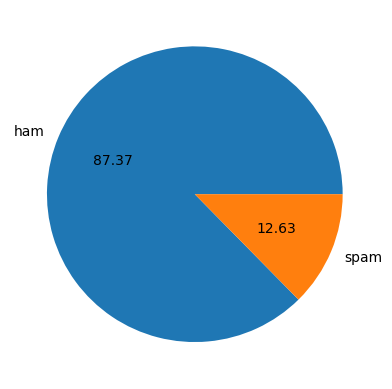

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels = ['ham','spam'],autopct = "%0.2f")
plt.show()

In [21]:
#data is imbalanced

In [22]:
# adding new columns in data set
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anshu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
# first column adding no of characters in the text
df['num_characters'] = df['text'].apply(len)

In [25]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
# second column adding no of word in the text with the help of nltk 
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))   #lambda: This is a lambda function, which is a way to define small, anonymous functions in Python.

In [27]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x))) 

In [29]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
# getting all info of new columns
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.978332,18.453279,1.947185
std,58.236795,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [31]:
# getting all info of new columns on only ham sms
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459699,17.120903,1.799601
std,56.358868,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [32]:
# getting all info of new columns on only spam sms
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [33]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

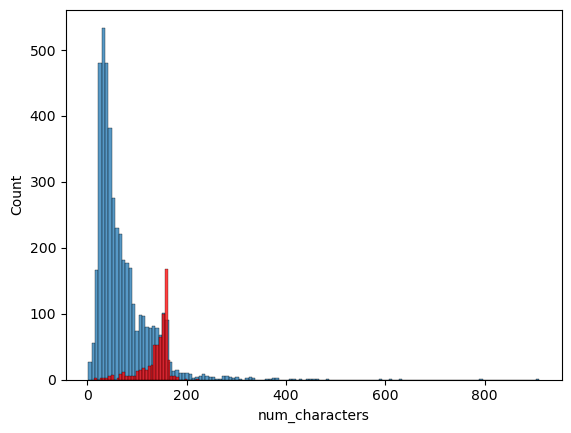

In [34]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color ='red')

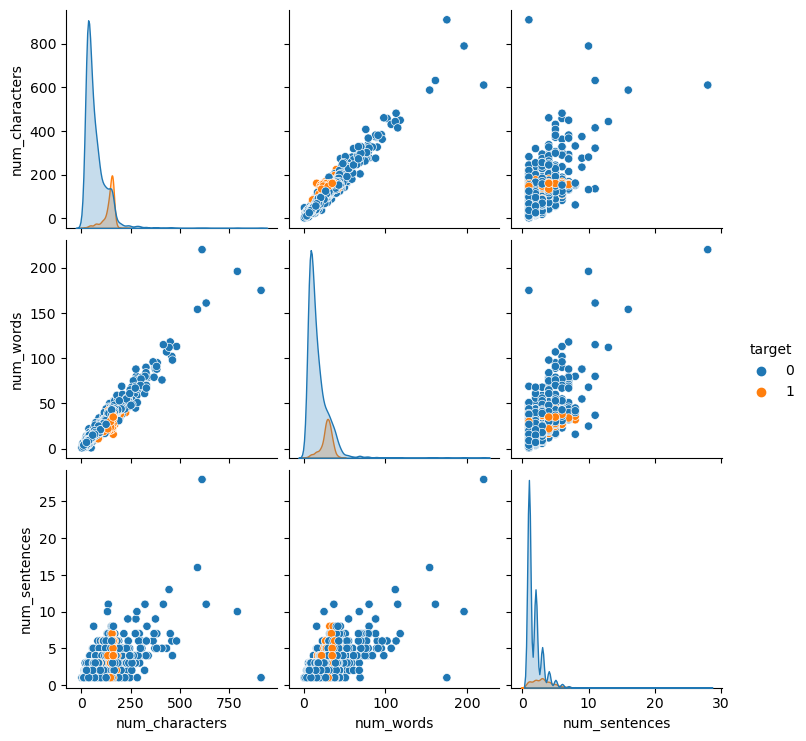

In [35]:
sns.pairplot(df,hue = 'target')

In [36]:
# correlation
df.corr(numeric_only=True)

,target,num_characters,num_words,num_sentences
target,1.000000,0.384711,0.262984,0.284901
num_characters,0.384711,1.000000,0.965772,0.638145
num_words,0.262984,0.965772,1.000000,0.684541
num_sentences,0.284901,0.638145,0.684541,1.000000


<Axes: >

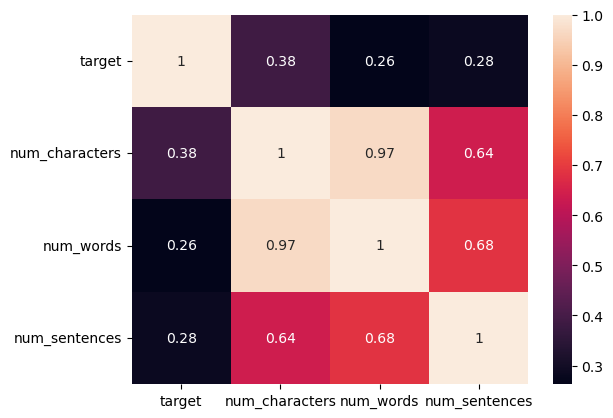

In [37]:
sns.heatmap(df.corr(numeric_only=True),annot =True)

## 3. Data Preprocessing
* Lower Case
* Tokenization
* Removing Special characters
* Removing stop words and punctuation
* stemming


In [38]:
# importing nltk library for stopwords
from nltk.corpus import stopwords

# importing string library for punctuation
import string

# importing nltk library for stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [39]:
def transform_text(text):
    text = text.lower()  # converting text to lower case
    text = nltk.word_tokenize(text)  # separating word in lists
    
    y = []  # removing special characters

    for i in text:
        if i.isalnum():
            y.append(i)
            
    text =y[:]
    y.clear()
    
    # removing stopwords and punctuation
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    # making every word in stem
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)   # returning in string formate

In [40]:
transform_text('hello how are you@#@ Anshul!. Are you eating right now?')

'hello anshul eat right'

In [41]:
transform_text(df['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [42]:
# now transform all text
df['transformed_ext'] = df['text'].apply(transform_text)

In [43]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_ext
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [44]:
# generating word cloud module of the spam messages
from wordcloud import WordCloud
wc = WordCloud(width =500,height =500,min_font_size= 10,background_color = 'white')

In [45]:
spam_wc = wc.generate(df[df['target']==1]['transformed_ext'].str.cat(sep =" "))

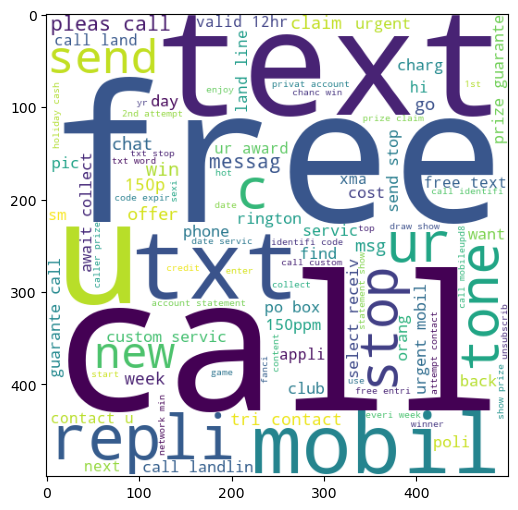

In [46]:
plt.figure(figsize =(15,6))
plt.imshow(spam_wc)

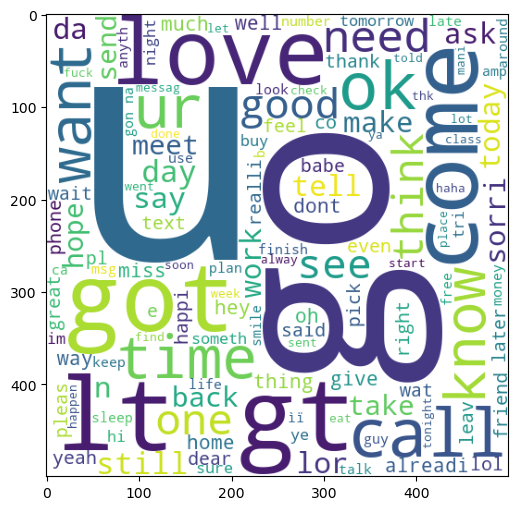

In [47]:
ham_wc = wc.generate(df[df['target']==0]['transformed_ext'].str.cat(sep =" "))
plt.figure(figsize =(15,6))
plt.imshow(ham_wc)

In [48]:
# getting spam messages words
spam_corpus =[]
for msg in df[df['target']==1]['transformed_ext'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [49]:
len(spam_corpus)

9939

In [50]:
# for spam messages
from collections import Counter
spam_mo = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count'])  # it count the words and store in the form of dictionary and store the data frame top 30 most occuring words

In [51]:
spam_mo.head()

,Word,Count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


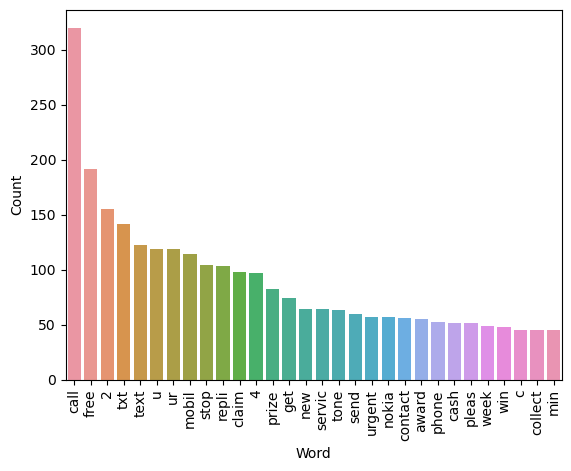

In [52]:
# now plotting the bar graph of words vs count of top 30 most occuring word
sns.barplot(x='Word', y='Count', data=spam_mo)
plt.xticks(rotation ='vertical')
plt.show()

In [53]:
# getting ham messages words
ham_corpus =[]
for msg in df[df['target']==0]['transformed_ext'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [54]:
# for ham messages
from collections import Counter
ham_mo = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Count'])  # it count the words and store in the form of dictionary and store the data frame top 30 most occuring words

In [55]:
len(ham_corpus)

35394

In [56]:
ham_mo.head()

,Word,Count
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287


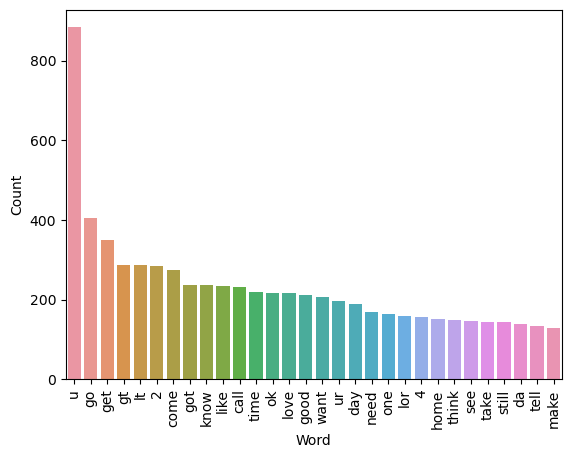

In [57]:
# now plotting the bar graph of words vs count of top 30 most occuring word
sns.barplot(x='Word', y='Count', data=ham_mo)
plt.xticks(rotation ='vertical')
plt.show()

# 4. Model Building

In [82]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features =3000)

In [83]:
#X = cv.fit_transform(df['transformed_ext']).toarray() # converting text to count values in each sms of each word
X = tfidf.fit_transform(df['transformed_ext']).toarray() #using tfidf vectorization method

In [84]:
X.shape

(5169, 3000)

In [85]:
y = df['target'].values

In [86]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =2) # splitting the data in train and test 

In [89]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB  # importing all type of naive bayes algorithm
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [90]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [91]:
# first using gaussianNB
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(f"Accuracy score: {accuracy_score(y_test, y_pred1)}")
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred1)}")
print(f"Precision Score: {precision_score(y_test, y_pred1)}")

Accuracy score: 0.8694390715667312
Confusion Matrix: [[788 108]
 [ 27 111]]
Precision Score: 0.5068493150684932


In [92]:
# using MultinomialNB
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(f"Accuracy score: {accuracy_score(y_test, y_pred2)}")
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred2)}")
print(f"Precision Score: {precision_score(y_test, y_pred2)}")

Accuracy score: 0.9709864603481625
Confusion Matrix: [[896   0]
 [ 30 108]]
Precision Score: 1.0


In [93]:
#using BernoulliNB
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(f"Accuracy score: {accuracy_score(y_test, y_pred3)}")
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred3)}")
print(f"Precision Score: {precision_score(y_test, y_pred3)}")

Accuracy score: 0.9835589941972921
Confusion Matrix: [[895   1]
 [ 16 122]]
Precision Score: 0.991869918699187


In [94]:
# chosing here tfidf ->  NB -> mnb

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [96]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [97]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [98]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [99]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [100]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8173076923076923
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92
For  xgb
Accuracy -  0.971953578336557
Precision -  0.943089430894309


In [101]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [102]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.971954,0.943089
6,AdaBoost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


In [103]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.974855
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.971954
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.947776
9,BgC,Accuracy,0.957447


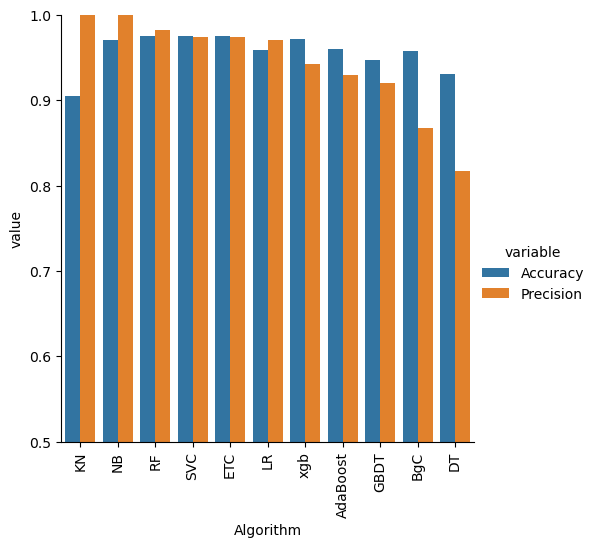

In [104]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

## Model Improve

In [105]:
# 1.Change the max_feature parameter of TfIdf 

In [106]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [113]:
performance_df1.head()

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.974855
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855


In [114]:
temp_df.head()

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576


In [115]:
import pickle
pickle.dump(transform_text,open('transform.pkl','wb'))
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))